# Exploratory Data Analysis

We first analyze each feature indivually to get a sense of each feature. Then, we take a look at the (linear and monotonic) correlations between features.  

In [123]:
# Import Libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [124]:
# Utility Functions

# draw the histogram for a given list of features
def draw_hist(feature, title, data, size=(10,5), alpha=0.7, bins=100):
    data[feature].plot.hist(figsize=size, alpha = alpha, bins = bins, 
                             title='Histogram - '+title);

    
# draw multiple histograms (minutely, hourly, daily)
def draw_hist_mult(feature, title, data, alpha=0.7, bins=30):
    f = plt.figure(figsize=(18,5))
    ax1 = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    ax1.hist(data[0][feature], bins=30, alpha=0.7);
    ax1.title.set_text('Minutely '+ title)

    ax2.hist(data[1][feature], bins=30, alpha=0.7);
    ax2.title.set_text('Hourly '+ title)

    ax3.hist(data[2][feature], bins=30, alpha=0.7);
    ax3.title.set_text('Daily '+ title)

# draw the kernel density distribution for a given list of features
def draw_dist(feature, title, data, size=(10,5)):
    data[feature].plot(figsize=size, kind='kde', title='Distribution - '+title);
    
# draw multiple distributions (minutely, hourly, daily)
def draw_hist_dist_mult(feature, title, data, bins=30):
    f = plt.figure(figsize=(18,5))
    ax1 = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    sns.distplot(data[0][feature], hist=True, kde=True, ax=ax1, 
                 bins=bins, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    ax1.title.set_text('Minutely')

    sns.distplot(data[1][feature], hist=True, kde=True, ax=ax2, 
                 bins=bins, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    ax2.title.set_text('Hourly')

    sns.distplot(data[2][feature], hist=True, kde=True, ax=ax3, 
                 bins=bins, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    ax3.title.set_text('Daily')
    plt.suptitle(title.capitalize() + ': Histograms')

# draw hourly and daily trends for a given list of features
def draw_trend(feature, title, data, loc=2):
    ax = data[0][feature].plot(figsize=(15,7), rot=0, title='Minutely, Hourly and Daily Trends - '+title, 
                            label='Hourly', linewidth=2);
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)

    data[1][feature].plot(figsize=(15,7), rot=0, label='Hourly', linewidth=2);
    data[2][feature].plot(figsize=(15,7), label='Daily', linewidth=3).autoscale(axis='y', tight=True);


    plt.legend(loc=loc, frameon=False);
    
# gets the correlation matrix for a given data and a given method
def draw_corr(data, title='Minutely', method='pearson'):
    corr = data.corr(method=method)
    plt.figure(figsize = (15, 7))
    plt.title(method.title() + ' Correlations: ' + title + ' Data')
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(10, 250, n=200),
        annot=True,
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

def draw_corr_both(data, data_title='', round_dec=2):
    corr_pearson = data.corr(method='pearson').round(round_dec)
    corr_spearman = data.corr(method='spearman').round(round_dec)

    f = plt.figure(figsize=(19,7))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    sns.heatmap(
        corr_pearson, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(10, 250, n=200),
        annot=True,
        square=True,
        ax=ax1,
        cbar=False
    )
    ax1.set_xticklabels(
        ax1.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    ax1.title.set_text('Pearson Correlation')


    sns.heatmap(
        corr_spearman, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(10, 250, n=200),
        annot=True,
        square=True,
        ax=ax2,
        cbar=True
    )
    ax2.set_yticklabels([])

    ax2.set_xticklabels(
        ax2.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    ax2.title.set_text('Spearman Correlation')

    plt.suptitle('Correlations in ' +  data_title + ' Data')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.3, hspace=None)
       
# draw positve (e.g., safe) vs. negative (e.g., harmful) bars in datasets 
def draw_bin_bars(feature, title, data, threshold, bars=('Safe', 'Harmful')):
    positives = []
    positives.append(data[0][feature] <= threshold)
    positives.append(data[1][feature] <= threshold)
    positives.append(data[2][feature] <= threshold)
    
    heights = []
    heights.append([np.sum(positives[0]), len(data[0])-np.sum(positives[0])])
    heights.append([np.sum(positives[1]), len(data[1])-np.sum(positives[1])])
    heights.append([np.sum(positives[2]), len(data[2])-np.sum(positives[2])])
    
    negatives_percent = []
    negatives_percent.append(round((len(data[0])-np.sum(positives[0]))/len(data[0])*100, 2))
    negatives_percent.append(round((len(data[1])-np.sum(positives[1]))/len(data[1])*100, 2))
    negatives_percent.append(round((len(data[2])-np.sum(positives[2]))/len(data[2])*100, 2))
    
    
    x_pos = np.arange(len(bars))

    f = plt.figure(figsize=(18,5))
    ax1 = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    ax1.bar(x_pos, heights[0], color=['green', 'red'], width=0.2)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(bars)
    ax1.title.set_text('Minutely ('+ str(negatives_percent[0]) + '% ' + bars[1]+')')
    
    ax2.bar(x_pos, heights[1], color=['green', 'red'], width=0.2)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(bars)
    ax2.title.set_text('Hourly ('+ str(negatives_percent[1]) + '% ' + bars[1] + ')')
    
    ax3.bar(x_pos, heights[2], color=['green', 'red'], width=0.2)
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(bars)
    ax3.title.set_text('Daily ('+ str(negatives_percent[2]) + '% ' + bars[1] +')')
    
    f.suptitle(title.capitalize() + ': ' + bars[0] +' vs. ' + bars[1] + ' Frequencies')
        
    
# find the outliers for a given feature
def find_anomalies(data):
    anomalies = []
    
    # Computing IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
     
    lower_limit  = Q1 - 1.5 * IQR 
    upper_limit = Q3 + 1.5 * IQR
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

# draw box plot for a given feautre
def draw_boxplot(feature, title, data, orient='h', size=(8,4)):
    sns.set(style="whitegrid")
    plt.rcParams['figure.figsize']=size
    plt.title('Box Plot - '+title)
    sns.boxplot(data=data[feature], orient=orient);

In [125]:
# read the datasets

df_complete = pd.read_pickle('Data/df_minutely')
df_hourly = pd.read_pickle('Data/df_hourly')
df_daily = pd.read_pickle('Data/df_daily')

## Ozone

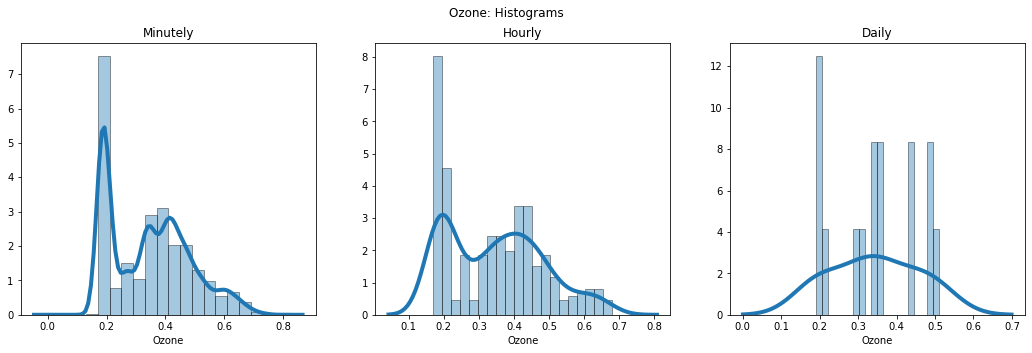

In [126]:
draw_hist_dist_mult('Ozone', 'Ozone', data=[df_complete, df_hourly, df_daily], bins=20)

To my best knowledge, a concentration level of 0.2ppm in Ozone could be harmful. Let us categorize the observations into the following 2 categories based on this guideline: 1. Safe (Ozone <0.2); 2. Harmful (Ozone >= 0.2).

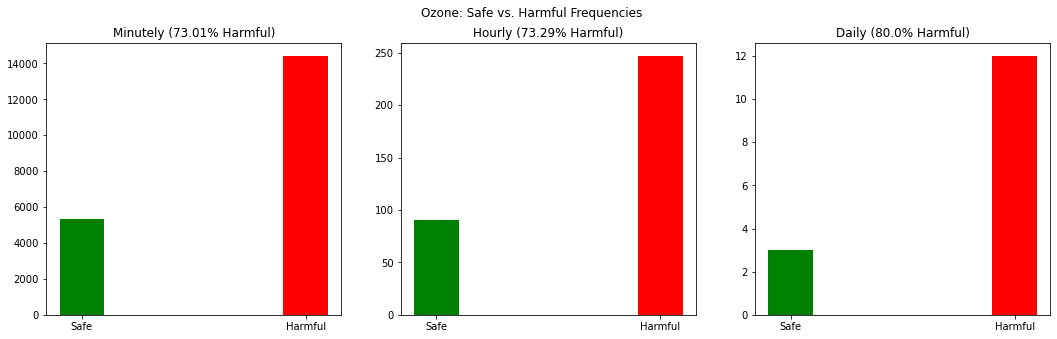

In [127]:
draw_bin_bars('Ozone', 'Ozone', [df_complete, df_hourly, df_daily], 0.2)

As seen in the following figure, it looks like 
- There is seasonality in June (till June 9th). 
- The least daily Ozone level is seen in May 30th and 31th. 
- The maximum daily level is seen in June 5th.

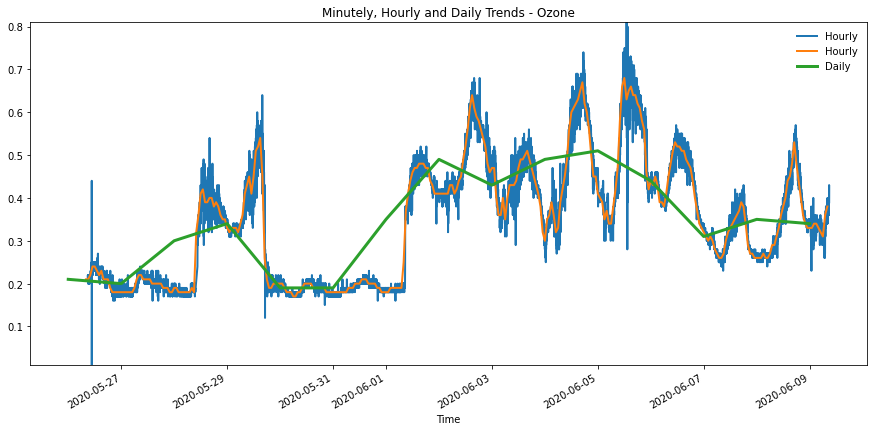

In [128]:
draw_trend('Ozone', 'Ozone', [df_complete, df_hourly, df_daily], loc=1)

##  Hydrogen Sulfide (H2S) 

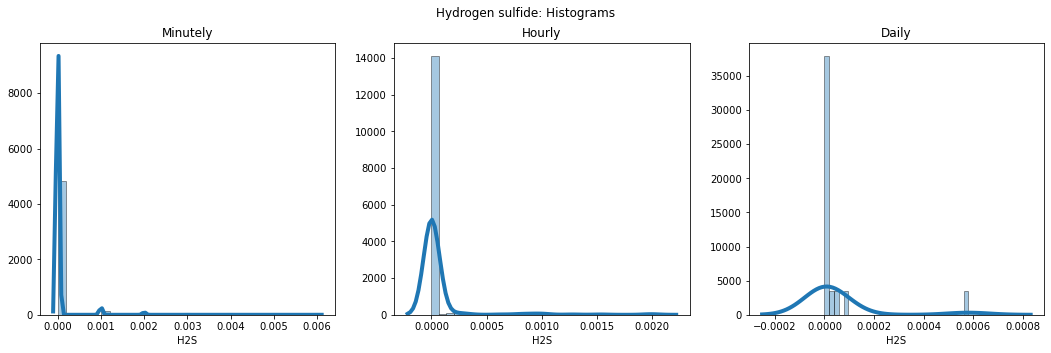

In [129]:
draw_hist_dist_mult('H2S', 'Hydrogen Sulfide', data=[df_complete, df_hourly, df_daily])

The typical background concentrations for Hydrogen Sulfide should be in the range of 0.00011 to 0.00033, and the odor threshold is something between 0.01 and 0.03.Let us categorize the observations into the following 2 categories: 1. Typical (Hydrogen Sulfide <=0.00033); 2. Non-typical (Hydrogen Sulfide > 0.00033).

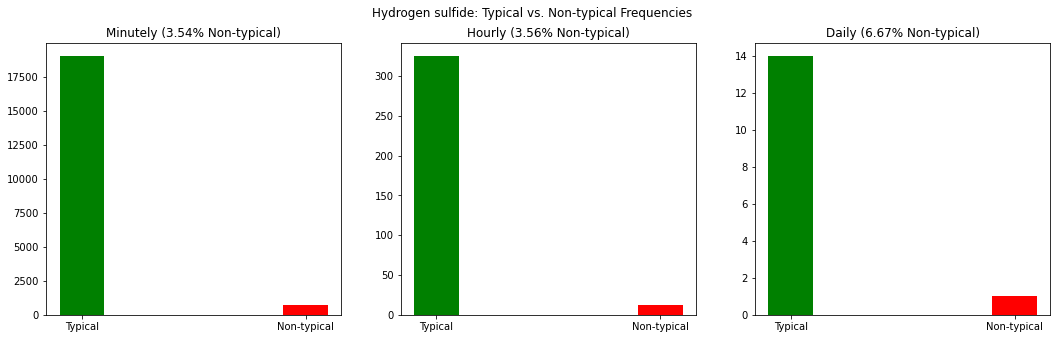

In [130]:
draw_bin_bars('H2S', 'Hydrogen Sulfide', [df_complete, df_hourly, df_daily], 0.00033, bars=('Typical', 'Non-typical'))

In [131]:
print('Number of unique values for H2S in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.H2S.unique())) + ', ' + 
      format(len(df_hourly.H2S.unique())) + ', ' + 
      format(len(df_daily.H2S.unique())))

Number of unique values for H2S in the minutely, hourly, and daily datasets are respectively as follow: 
7, 23, 5


Accoridng to the following figure, it seems that H2S shouldn't give us very important information about the daily data. The most of the trend is flat on the 0 level:

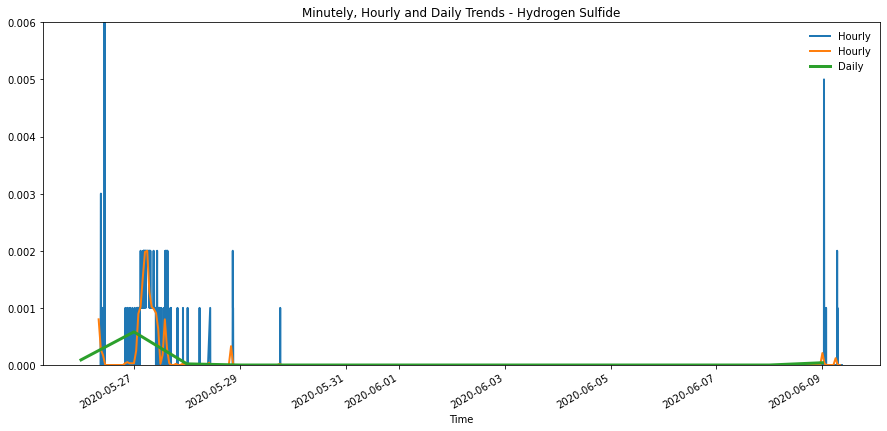

In [132]:
draw_trend('H2S', 'Hydrogen Sulfide', [df_complete, df_hourly, df_daily], loc=1)

## Total VOCs

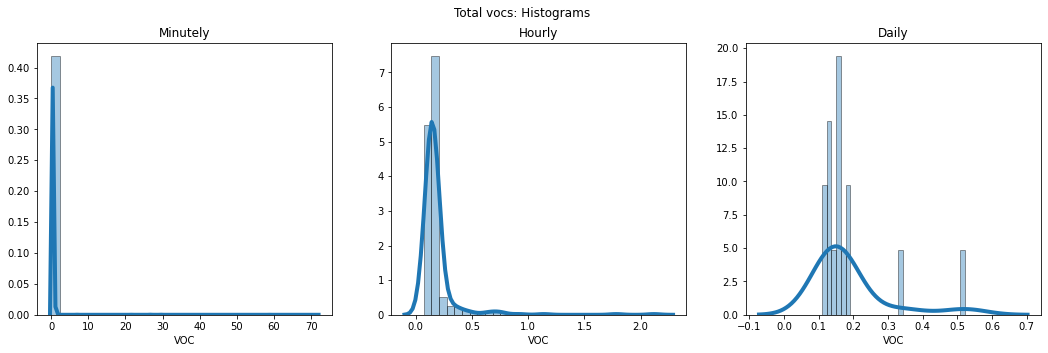

In [133]:
draw_hist_dist_mult('VOC', 'Total VOCs', data=[df_complete, df_hourly, df_daily])

Note the corresponding daily and hourly lines in the following plot, where they lies on around 0. 

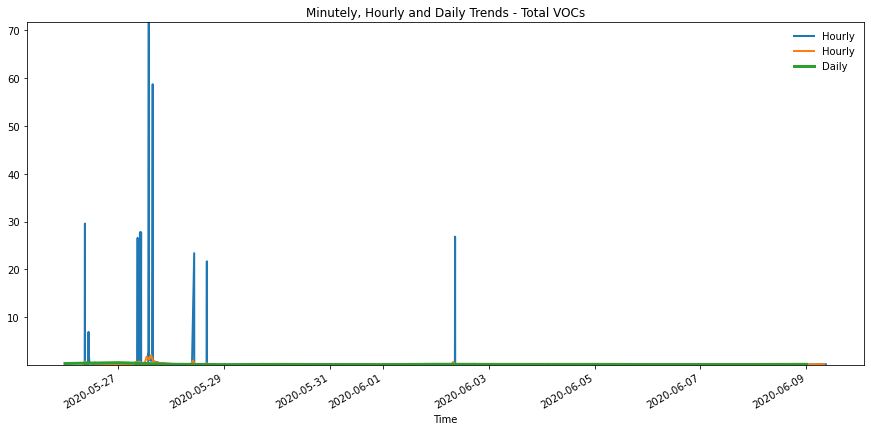

In [134]:
draw_trend('VOC', 'Total VOCs', [df_complete, df_hourly, df_daily], loc=1)

In [135]:
print('Number of unique values for "VOC" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.VOC.unique())) + ', ' + 
      format(len(df_hourly.VOC.unique())) + ', ' + 
      format(len(df_daily.VOC.unique())))

Number of unique values for "VOC" in the minutely, hourly, and daily datasets are respectively as follow: 
664, 138, 15


## Carbon Dioxide (CO2)

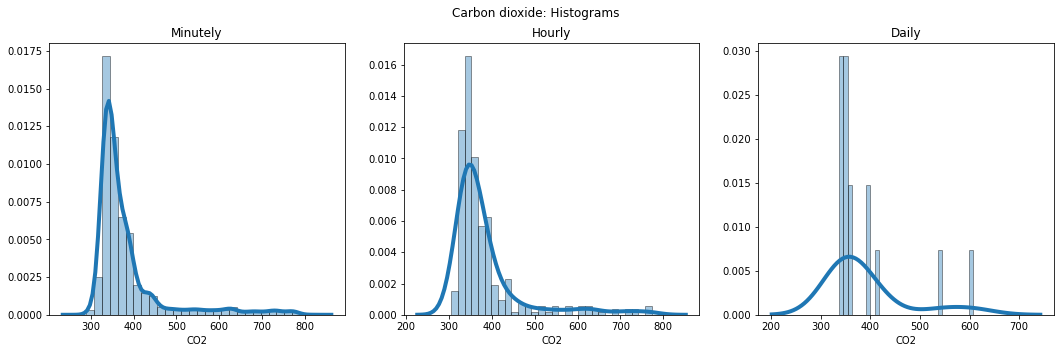

In [136]:
draw_hist_dist_mult('CO2', 'Carbon Dioxide', data=[df_complete, df_hourly, df_daily])

There is descending trend in the levels of CO2 concentration in the data:

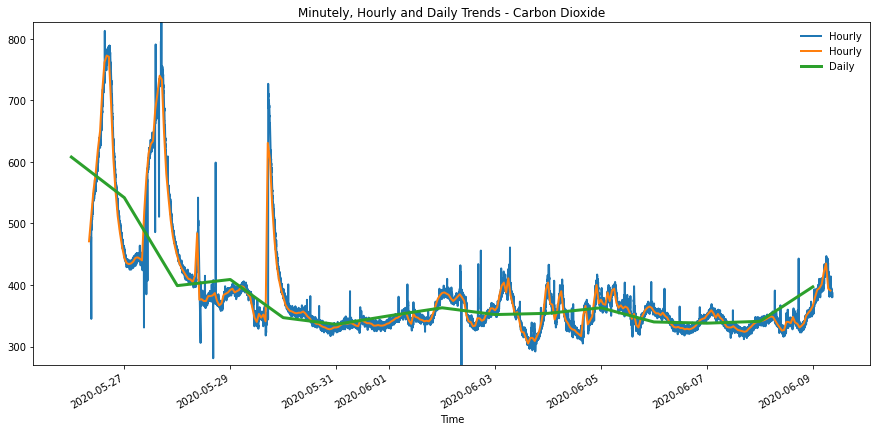

In [137]:
draw_trend('CO2', 'Carbon Dioxide', [df_complete, df_hourly, df_daily], loc=1)

## Particulate Matter 1

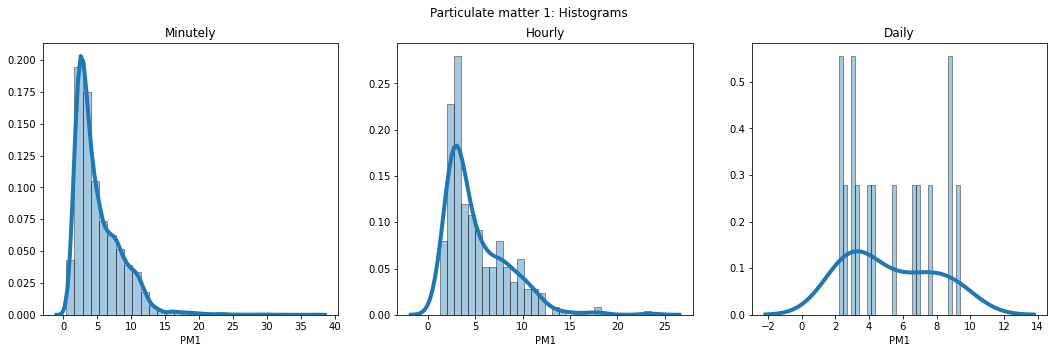

In [138]:
draw_hist_dist_mult('PM1', 'Particulate Matter 1', data=[df_complete, df_hourly, df_daily])

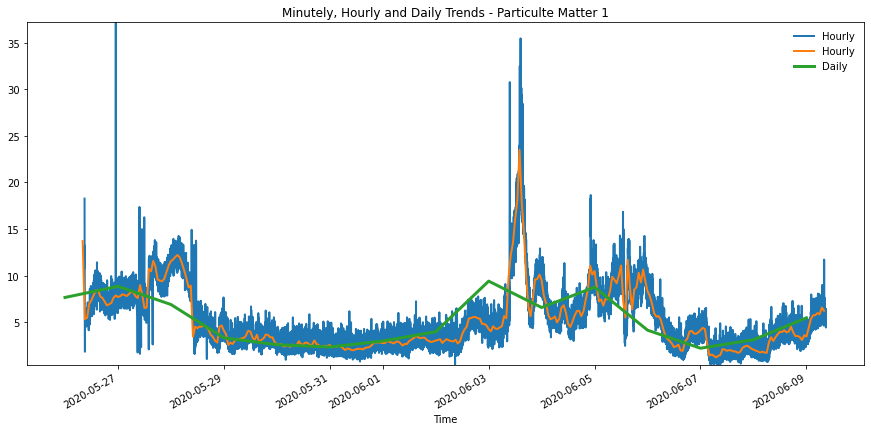

In [139]:
draw_trend('PM1', 'Particulte Matter 1', [df_complete, df_hourly, df_daily], loc=1)

In [140]:
print('Number of unique values for "PM1" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.PM1.unique())) + ', ' + 
      format(len(df_hourly.PM1.unique())) + ', ' + 
      format(len(df_daily.PM1.unique())))

Number of unique values for "PM1" in the minutely, hourly, and daily datasets are respectively as follow: 
8713, 337, 15


## Particulate Matter 2.5 

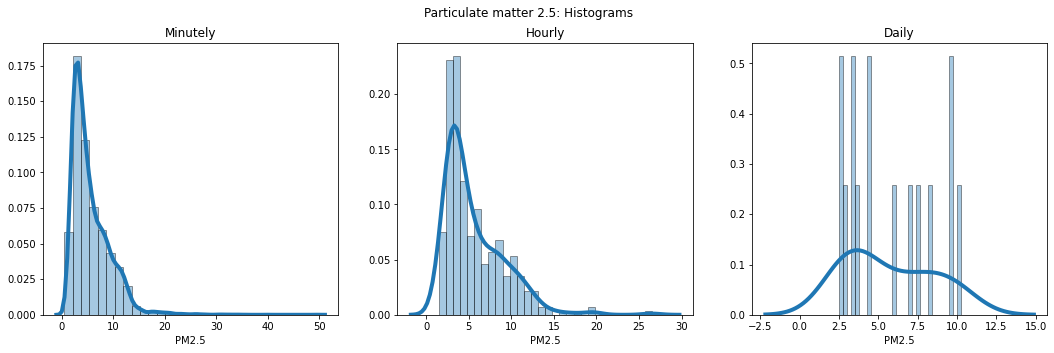

In [141]:
draw_hist_dist_mult('PM2.5', 'Particulate Matter 2.5', data=[df_complete, df_hourly, df_daily])

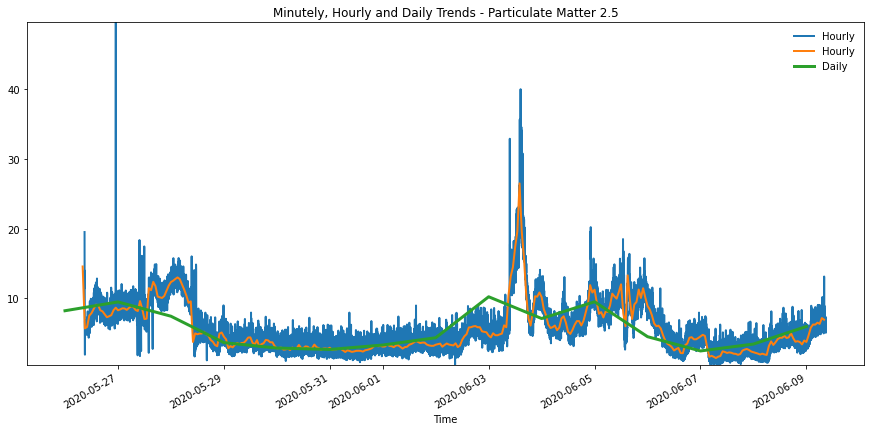

In [142]:
draw_trend('PM2.5', 'Particulate Matter 2.5', [df_complete, df_hourly, df_daily], loc=1)

In [143]:
print('Number of unique values for "PM10" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete['PM2.5'].unique())) + ', ' + 
      format(len(df_hourly['PM2.5'].unique())) + ', ' + 
      format(len(df_daily['PM2.5'].unique())))

Number of unique values for "PM10" in the minutely, hourly, and daily datasets are respectively as follow: 
9123, 337, 15


## Particulate Matter 10

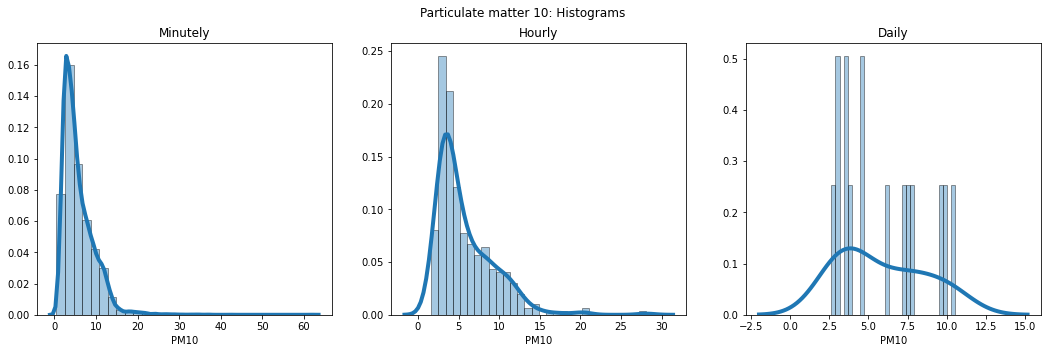

In [144]:
draw_hist_dist_mult('PM10', 'Particulate Matter 10', data=[df_complete, df_hourly, df_daily])

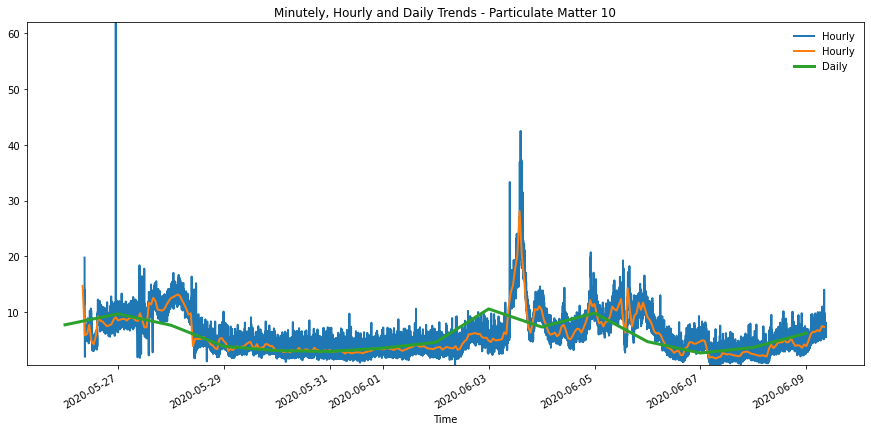

In [145]:
draw_trend('PM10', 'Particulate Matter 10', [df_complete, df_hourly, df_daily], loc=1)

In [146]:
print('Number of unique values for "PM10" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.PM10.unique())) + ', ' + 
      format(len(df_hourly.PM10.unique())) + ', ' + 
      format(len(df_daily.PM10.unique())))

Number of unique values for "PM10" in the minutely, hourly, and daily datasets are respectively as follow: 
9276, 327, 15


## Internal Temperature

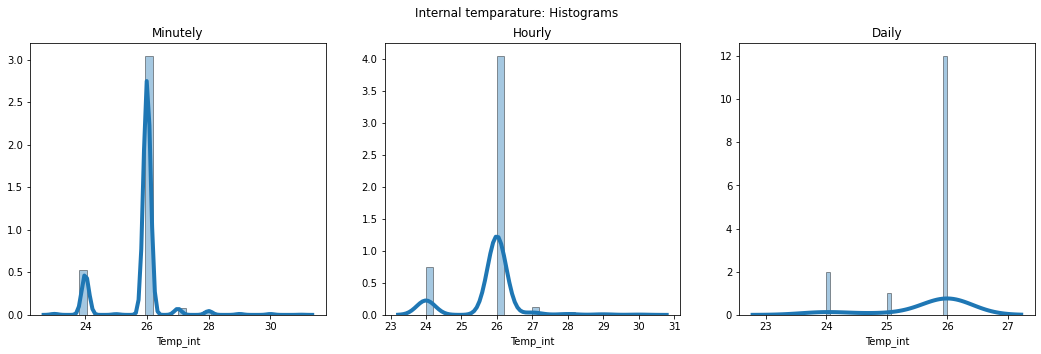

In [147]:
draw_hist_dist_mult('Temp_int', 'Internal Temparature', data=[df_complete, df_hourly, df_daily])

Considering the daily trend, the internal temparature starts with 24C and then has an ascending trend, and finally gets a flate level on 26C on May 29th:

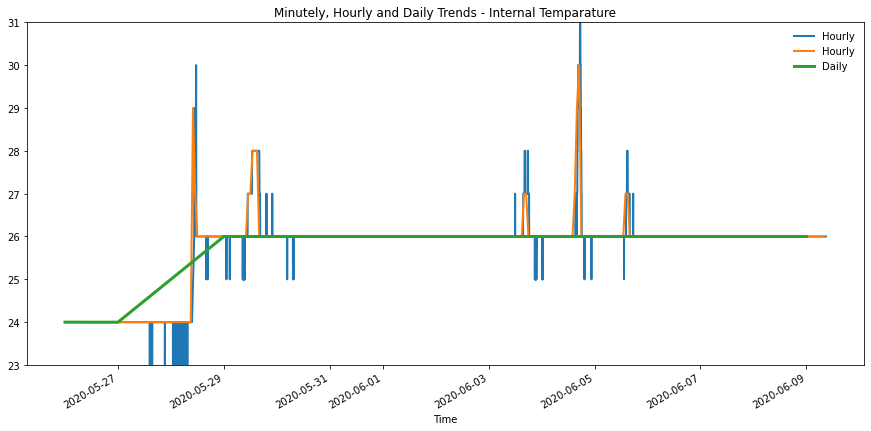

In [148]:
draw_trend('Temp_int', 'Internal Temparature', [df_complete, df_hourly, df_daily], loc=1)

In [149]:
print('Number of unique values for "Internal Temparature" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.Temp_int.unique())) + ', ' + 
      format(len(df_hourly.Temp_int.unique())) + ', ' + 
      format(len(df_daily.Temp_int.unique())))

Number of unique values for "Internal Temparature" in the minutely, hourly, and daily datasets are respectively as follow: 
9, 6, 3


## Internal Humidity

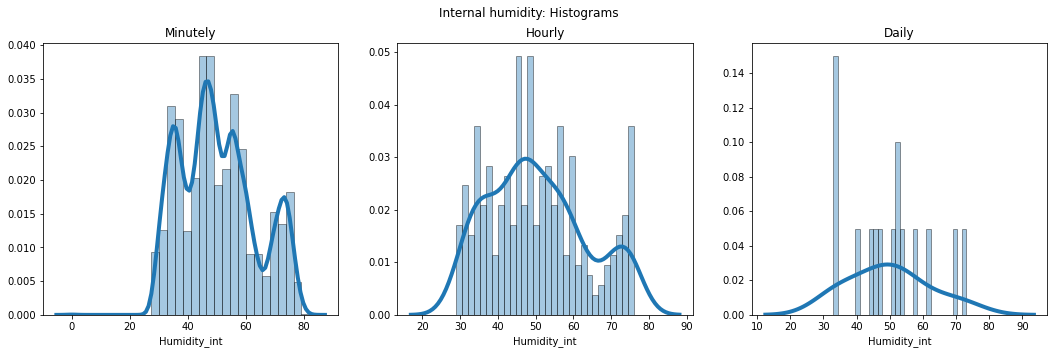

In [150]:
draw_hist_dist_mult('Humidity_int', 'Internal Humidity', data=[df_complete, df_hourly, df_daily])

It looks like, there is descending trend in internal humdity starting June 1st:

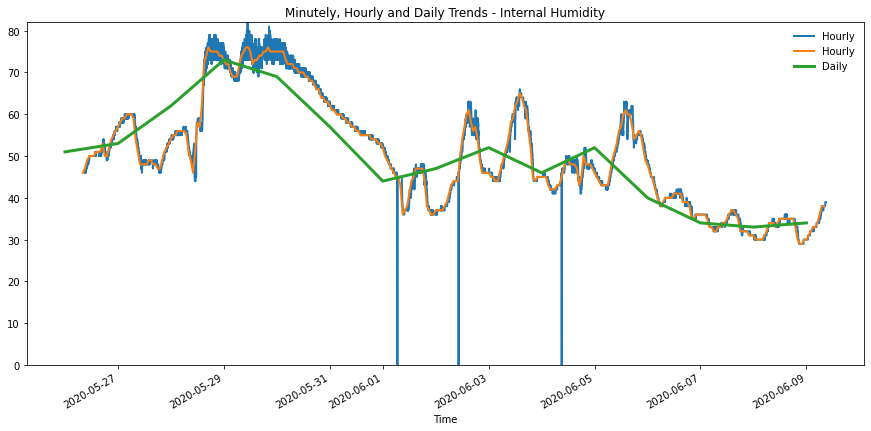

In [151]:
draw_trend('Humidity_int', 'Internal Humidity', [df_complete, df_hourly, df_daily], loc=1)

In [152]:
print('Number of unique values for "Internal Humidity" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.Humidity_int.unique())) + ', ' + 
      format(len(df_hourly.Humidity_int.unique())) + ', ' + 
      format(len(df_daily.Humidity_int.unique())))

Number of unique values for "Internal Humidity" in the minutely, hourly, and daily datasets are respectively as follow: 
55, 48, 13


## External Temparature 

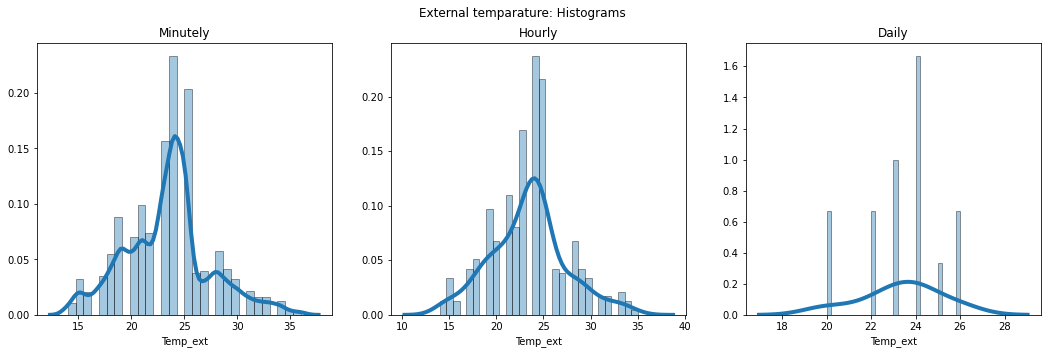

In [153]:
draw_hist_dist_mult('Temp_ext', 'External Temparature', data=[df_complete, df_hourly, df_daily])

As seen below, it looks like there is hourly seasonality trend in the externalt temparature in June. 

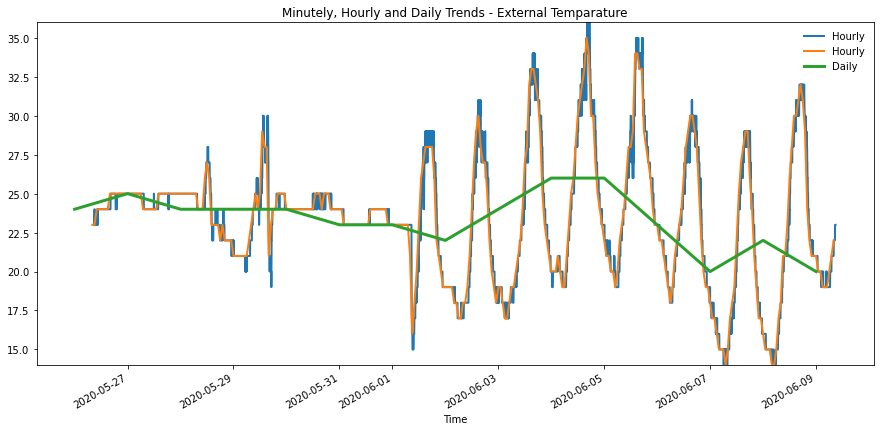

In [154]:
draw_trend('Temp_ext', 'External Temparature', [df_complete, df_hourly, df_daily], loc=1)

In [155]:
print('Number of unique values for "External Temparature" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.Temp_ext.unique())) + ', ' + 
      format(len(df_hourly.Temp_ext.unique())) + ', ' + 
      format(len(df_daily.Temp_ext.unique())))

Number of unique values for "External Temparature" in the minutely, hourly, and daily datasets are respectively as follow: 
23, 22, 6


## External Humidity

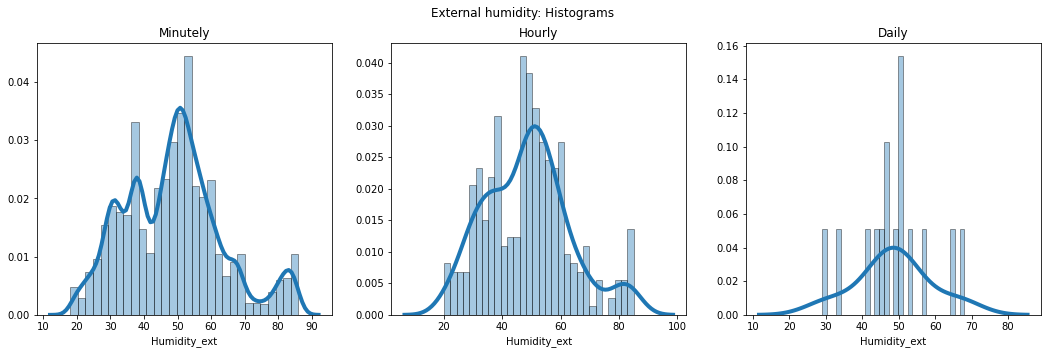

In [156]:
draw_hist_dist_mult('Humidity_ext', 'External Humidity', data=[df_complete, df_hourly, df_daily])

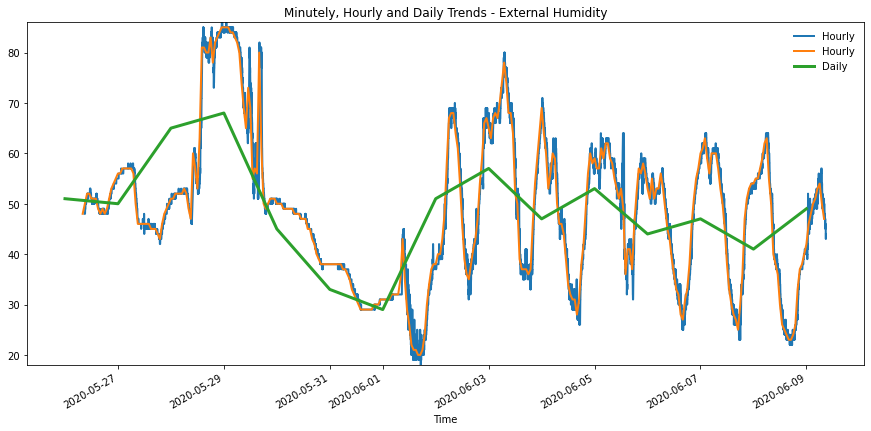

In [157]:
draw_trend('Humidity_ext', 'External Humidity', [df_complete, df_hourly, df_daily], loc=1)

In [158]:
print('Number of unique values for "External Humidity" in the minutely, hourly, and daily datasets are respectively as follow: \n' + 
      format(len(df_complete.Humidity_ext.unique())) + ', ' + 
      format(len(df_hourly.Humidity_ext.unique())) + ', ' + 
      format(len(df_daily.Humidity_ext.unique())))

Number of unique values for "External Humidity" in the minutely, hourly, and daily datasets are respectively as follow: 
69, 60, 13


## Correlations
Let us consider 0.9 as the correlation threshold. As seen in the following plots,
1. There are strong correlations between Particulate Matters 1, 2.5, 10 (PM1, PM2.5, PM10, respectively).  
2. In the daily data, there are high correlation between  
    2.1. Internal Temperature (Temp_int) has strong correlation with Total VOCs (VOC) and Carbon Dioxide (CO2),  
    2.2. Hydrogen Sulfide (H2S) has a strong correlation with Total VOCs (VOC) 
    
    

    
- It will be the best to keep PM10 and drop PM1 & PM2.5 from all datasetes. Considering the daily dataset, PM10 has less correlations with other features than PM1 and PM2.5 do. 
- In the daily dataset, let's drop Temp_int and H2S. 



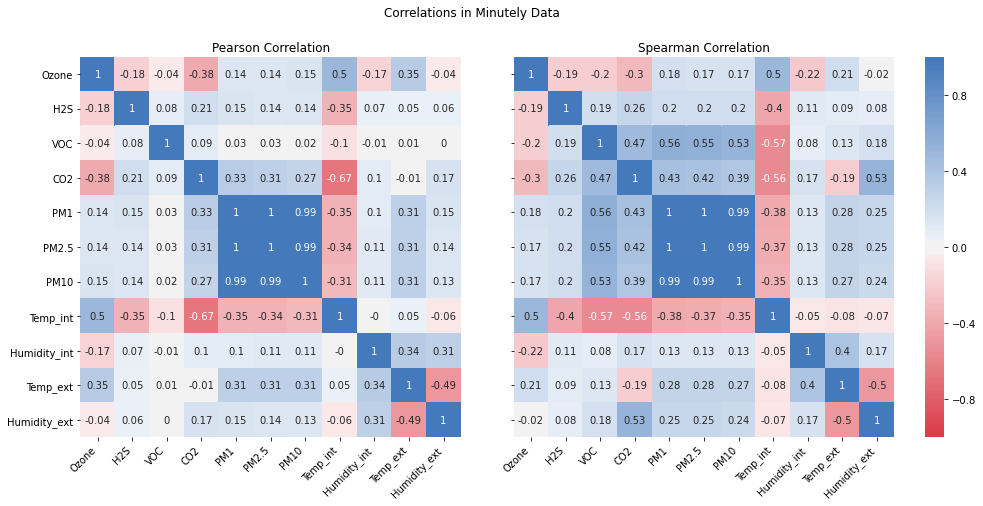

In [159]:
draw_corr_both(df_complete, data_title='Minutely')

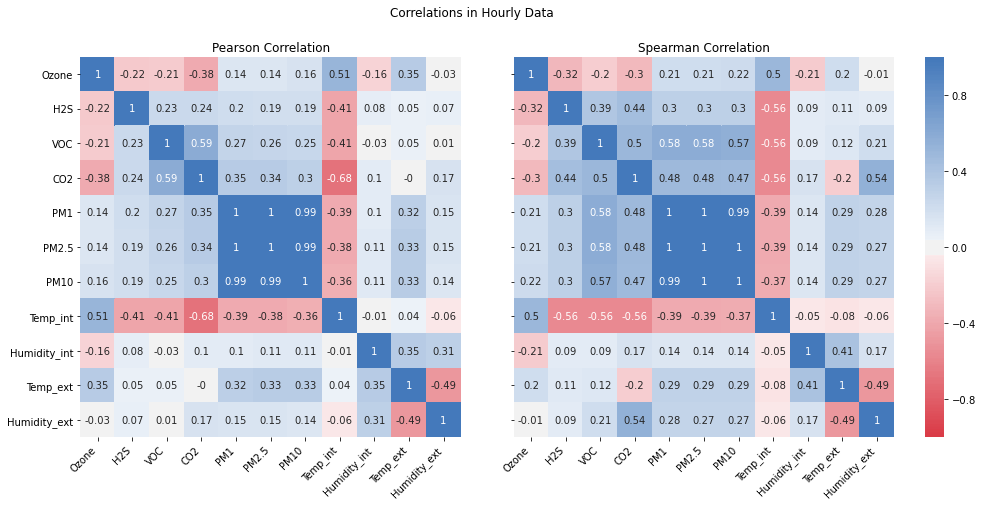

In [160]:
draw_corr_both(df_hourly, data_title='Hourly')

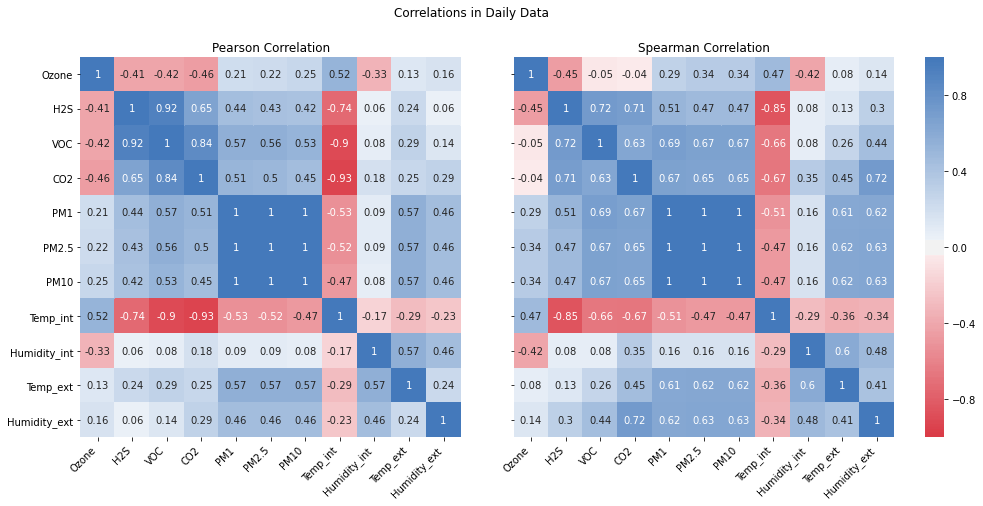

In [161]:
draw_corr_both(df_daily, data_title='Daily')

In [162]:
# Drop PM1 & PM2.5 from all datasets

df_complete.drop(['PM1', 'PM2.5'], axis=True, inplace=True)
df_hourly.drop(['PM1', 'PM2.5'], axis=True, inplace=True)
df_daily.drop(['PM1', 'PM2.5'], axis=True, inplace=True)

In [163]:
# Drop Temp_int & H2S from the daily dataset

df_daily.drop(['Temp_int', 'H2S'], axis=1, inplace=True)

In [164]:
# serialize the datasets

df_complete.to_pickle('Data/df_minutely_v2')
df_hourly.to_pickle('Data/df_hourly_v2')
df_daily.to_pickle('Data/df_daily_v2')